# Brianne Bell 
## ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics
### January 23, 2023

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
#import nltk
#nltk.download('stopwords')
sw = stopwords.words("english")

In [20]:
# Add any additional import statements you need here
import textacy.preprocessing as tprep
import regex as re


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509_M2-textmine-token-norm/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
#twitter_folder = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509_M2-textmine-token-norm/twitter"
#lyrics_folder = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509_M2-textmine-token-norm/lyrics"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"
print(twitter_folder)
print(lyrics_folder)

twitter/
lyrics/


In [37]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens # unique/all
    num_characters = sum(len(i) for i in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print("\nThe top 5 most common tokens:\n") # {name} gives updated value
        print(Counter(tokens).most_common(5))
        
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [38]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

The top 5 most common tokens:

[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


---
**Q:** Why is it beneficial to use assertion statements in your code? 

**A:** Assertion statements let you check that your code is still true which indicates that your code is not buggy (at that point in the code). This will allow programming to run more smoothly because you won't have to hunt down a bug because you will know where it has appeared. 

https://realpython.com/python-assert-statement/#:~:text=Python%E2%80%99s%20assert%20statement%20allows%20you%20to%20write%20sanity,then%20you%20have%20a%20bug%20in%20your%20code.

---

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [77]:
path = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509_M2-textmine-token-norm/lyrics"
print(os.listdir(path))

['cher', 'robyn']


In [80]:
# Read in the lyrics data

#initializing lists
artists = []
song_title = []
song_lyrics = []

lyrics_data = {}

# looping through the files
for artist in os.listdir(path):
    artist_name = os.path.join(path, artist)
    
    for file in os.listdir(artist_name):
        filename = os.path.join(path, artist, file)
        
        with open(filename) as infile:
            songs = infile.readlines()
            
        artists.append(artist)
        song_title.append(songs[0])
        song_lyrics.append(''.join(songs))
        
        
lyrics_df = pd.DataFrame({'artist': artists,
                         'song_title': song_title,
                         'song_lyrics':song_lyrics})

#checking
lyrics_df.head(5)


,artist,song_title,song_lyrics
0,cher,"""88 Degrees""\n","""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,"""A Different Kind Of Love Song""\n","""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,"""After All""\n","""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,"""Again""\n","""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,"""Alfie""\n","""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


In [81]:
# checking tail
lyrics_df.tail(5)

,artist,song_title,song_lyrics
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ..."
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ..."
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty..."
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m..."
419,robyn,"""You've Got That Something""\n","""You've Got That Something""\n\n\n\nLook at me ..."


In [8]:
# setting up path to read in 
twitter_folder2 = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509_M2-textmine-token-norm/twitter"
twitter_descrip_dict = defaultdict(list)

for path in os.listdir(twitter_folder2):
    artist_folder_path = os.path.join(twitter_folder2, path)
    openfile_to_read = open(artist_folder_path, "r", encoding= 'utf-8', errors= 'ignore')
    for line in openfile_to_read.readlines():
        current_line = (line.split('\t'))
        if(len(current_line) >= 6):
            description = current_line[6]
            description = description.strip()
            if description != 'description' and description != '':
                twitter_descrip_dict[path.split('_')[0]].append(description)


# chekcing            
# twitter_descrip_dict

twitter_descrip_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in twitter_descrip_dict.items()]))
#twitter_descrip_df.head(5)

In [24]:
# separating out
cher_twitter = pd.DataFrame({'artist': 'cher', 'description': twitter_descrip_df['cher']})
#cher_twitter.head(5)
robyn_twitter = pd.DataFrame({'artist': 'robynkonichiwa', 'description': twitter_descrip_df['robynkonichiwa']})
robyn_twitter.head(5)

# combining for cleaning:
twitter_df = pd.concat([cher_twitter, robyn_twitter])
twitter_df['description'] = twitter_df['description'].astype(str)
#checking
twitter_df.sample(10)

,artist,description
1297966,robynkonichiwa,nan
1158251,cher,"IFFBoston Volunteer Coordinator, Cyclist, Movi..."
1556595,cher,DjBojack: Tallahassee Own / Promoter & Promoti...
626810,cher,"British, pro-business, pro-common sense & pro-..."
969198,robynkonichiwa,nan
1934371,robynkonichiwa,nan
1818472,cher,Follow my nigga @lil bibby Follow me I follow ...
854589,cher,I just wanna explore the world with my eyes in...
968622,robynkonichiwa,nan
1443233,robynkonichiwa,nan


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [10]:
punctuation = set(punctuation) # speeds up comparison

#punctuation

In [83]:
# functions for cleaning

# Removing punctuation
def remove_punctuation(text):
    return ''.join([i for i in text if i not in punctuation])

# splitting on whitespace
def split_on_whitespace(text):
    #text= text.str.split()
    text= re.sub(r'\s+', ' ', text) 
    return text.strip()

# tokenization function
def tokenization(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

# remove stopwords (sw)
def remove_stopwords(tokens):
    text_list= [i for i in tokens if i.lower() not in sw] # gives back i if it's not a stopword
    return text_list

In [84]:
# create your clean twitter data here

# remove punctuation
twitter_df['no_punc'] = twitter_df['description'].map(remove_punctuation)

# remove whitespace
twitter_df['no_ws'] = twitter_df['no_punc'].map(split_on_whitespace)

# making lowercase
twitter_df['no_ws'] = twitter_df['no_ws'].apply(lambda x: x.lower())

# tokenizing
twitter_df['tokenized'] = twitter_df['no_ws'].map(tokenization)

# removing stop words
twitter_df['tokens'] = twitter_df['tokenized'].map(remove_stopwords)

twitter_df.sample(10)

,artist,description,no_punc,no_ws,tokenized,tokens,hashtags
1628802,cher,singer/songwriter,singersongwriter,singersongwriter,[singersongwriter],[singersongwriter],[]
1177507,robynkonichiwa,nan,nan,nan,[nan],[nan],[]
814382,robynkonichiwa,nan,nan,nan,[nan],[nan],[]
1468803,cher,Comunicadora social,Comunicadora social,comunicadora social,"[comunicadora, social]","[comunicadora, social]",[]
1989886,robynkonichiwa,nan,nan,nan,[nan],[nan],[]
1977152,robynkonichiwa,nan,nan,nan,[nan],[nan],[]
915657,cher,My. lawyer. liked. that.,My lawyer liked that,my lawyer liked that,"[my, lawyer, liked, that]","[lawyer, liked]",[]
1595692,cher,🌸🌺,🌸🌺,🌸🌺,[],[],[]
171631,cher,I'm a security guard at casting solutions,Im a security guard at casting solutions,im a security guard at casting solutions,"[im, a, security, guard, at, casting, solutions]","[im, security, guard, casting, solutions]",[]
1574118,robynkonichiwa,nan,nan,nan,[nan],[nan],[]


In [85]:
# create your clean lyrics data here lyrics_df

# remove punctuation
lyrics_df['song_lyrics'] = lyrics_df['song_lyrics'].map(remove_punctuation)

# remove whitespace
lyrics_df['song_lyrics'] = lyrics_df['song_lyrics'].map(split_on_whitespace)

# making lowercase
lyrics_df['song_lyrics'] = lyrics_df['song_lyrics'].apply(lambda x: x.lower())

# tokenizing
lyrics_df['tokenized'] = lyrics_df['song_lyrics'].map(tokenization)

# removing stop words
lyrics_df['tokens'] = lyrics_df['tokenized'].map(remove_stopwords)

lyrics_df.sample(10)


,artist,song_title,song_lyrics,tokenized,tokens
127,cher,"""It Might As Well Stay Monday (From Now On)""\n",it might as well stay monday from now on here ...,"[it, might, as, well, stay, monday, from, now,...","[might, well, stay, monday, monday, morning, r..."
27,cher,"""By Myself""\n",by myself i gotta go on my way by myself becau...,"[by, myself, i, gotta, go, on, my, way, by, my...","[gotta, go, way, end, romance, gotta, go, way,..."
393,robyn,"""O Baby""\n",o baby chorus o baby youre making that mistake...,"[o, baby, chorus, o, baby, youre, making, that...","[baby, chorus, baby, youre, making, mistake, o..."
385,robyn,"""Monday Morning""\n",monday morning whispered friday saturday sunda...,"[monday, morning, whispered, friday, saturday,...","[monday, morning, whispered, friday, saturday,..."
191,cher,"""One Of Us""\n",one of us they passed me by all of those great...,"[one, of, us, they, passed, me, by, all, of, t...","[one, us, passed, great, romances, felt, robbi..."
414,robyn,"""We Dance To The Beat""\n",we dance to the beat we dance to the beat we d...,"[we, dance, to, the, beat, we, dance, to, the,...","[dance, beat, dance, beat, dance, beat, dance,..."
241,cher,"""Take Me For A Little While""\n",take me for a little while ive been trying to ...,"[take, me, for, a, little, while, ive, been, t...","[take, little, ive, trying, make, love, everyt..."
14,cher,"""A Young Girl (Une Enfante)""\n",a young girl une enfante she left her neighbor...,"[a, young, girl, une, enfante, she, left, her,...","[young, girl, une, enfante, left, neighborhood..."
371,robyn,"""In My Heart""\n",in my heart hope things will get better cause ...,"[in, my, heart, hope, things, will, get, bette...","[heart, hope, things, get, better, cause, that..."
281,cher,"""Walk With Me""\n",walk with me standing all alone inside a crowd...,"[walk, with, me, standing, all, alone, inside,...","[walk, standing, alone, inside, crowd, someone..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [86]:
# set up for calls to descriptive_stats here

# function to flatten tokens columns to list of lists for function
    # then send it to the descriptive_stats(tokens, num_tokens = 5, verbose=True) function
def flattened_descriptive_stats(list_of_lists):
    listed_words = [i for n in list_of_lists for i in n]
    return descriptive_stats(listed_words)


In [87]:
# calls to descriptive_stats here <flattened_descriptive_stats>
print('\nCher Twitter Descriptive Stats:\n')
flattened_descriptive_stats(twitter_df[twitter_df['artist']=='cher']['tokens'])

print('\nCher Lyrics Descriptive Stats:\n')
flattened_descriptive_stats(lyrics_df[lyrics_df['artist']=='cher']['tokens'])


Cher Twitter Descriptive Stats:

There are 14779802 tokens in the data.
There are 1194810 unique tokens in the data.
There are 89837791 characters in the data.
The lexical diversity is 0.081 in the data.

The top 5 most common tokens:

[('love', 217449), ('im', 139831), ('life', 126418), ('music', 90024), ('de', 73084)]

Cher Lyrics Descriptive Stats:

There are 35911 tokens in the data.
There are 3696 unique tokens in the data.
There are 172596 characters in the data.
The lexical diversity is 0.103 in the data.

The top 5 most common tokens:

[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]


[35911, 3696, 0.102921110523238, 172596]

In [88]:
# calls to descriptive_stats here <flattened_descriptive_stats>
print('\nRobyn Twitter Descriptive Stats:\n')
flattened_descriptive_stats(twitter_df[twitter_df['artist']=='robynkonichiwa']['tokens'])

print('\nRobyn Lyrics Descriptive Stats:\n')
flattened_descriptive_stats(lyrics_df[lyrics_df['artist']=='robyn']['tokens'])


Robyn Twitter Descriptive Stats:

There are 3236300 tokens in the data.
There are 226027 unique tokens in the data.
There are 14328650 characters in the data.
The lexical diversity is 0.070 in the data.

The top 5 most common tokens:

[('nan', 1811066), ('music', 15345), ('love', 11820), ('im', 9096), ('och', 7923)]

Robyn Lyrics Descriptive Stats:

There are 15306 tokens in the data.
There are 2156 unique tokens in the data.
There are 73754 characters in the data.
The lexical diversity is 0.141 in the data.

The top 5 most common tokens:

[('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 252)]


[15306, 2156, 0.14085979354501502, 73754]

---
**Q:** How do you think the "top 5 words" would be different if we left stopwords in the data? 

**A:** If we included the stop words in exploring the "top 5 words" we would have nonsense words like the, a, or and which would not provide any type of insight to lyric meanings.

---

**Q:** What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

**A:** I had to look up who robynkonichiwa since I am using the provided files so I didn't have any prior beliefs about the lexical diversity between her and Cher. I'm sure if I went with the artists from assingment 1 (Kelsea Ballerini and Carrie Underwood) they would have very low lexical diversity since they are both country music artists. 

---


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [43]:
def is_emoji(s):
    return (emoji.is_emoji(s))

assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [89]:
# Your code here
# Cher emoji follower info
cher_emoji = []
for i in twitter_df[twitter_df['artist']=='cher']['description']:
    for token in i:
        if emoji.is_emoji(token):
            cher_emoji.append(token)
            
# counting emojis for Cher
cher_emoji_count = Counter(cher_emoji)
print("Top 10 most common emojis from Cher's followers:")
print(cher_emoji_count.most_common(10))

Top 10 most common emojis from Cher's followers:
[('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]


In [90]:
# Robyn emoji follower info
robyn_emoji = []
for i in twitter_df[twitter_df['artist']=='robynkonichiwa']['description']:
    for token in i:
        if emoji.is_emoji(token):
            robyn_emoji.append(token)
            
# counting emojis for Cher
robyn_emoji_count = Counter(robyn_emoji)
print("Top 10 most common emojis from Robyn's followers:")
print(robyn_emoji_count.most_common(10))

Top 10 most common emojis from Robyn's followers:
[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [91]:
# Your code here
hashtag_regex = re.compile(r'#([a-zA-Z]+)')
# Cher Hashtags
# setting up lists
cher_hashtag = []

for tag in twitter_df[twitter_df['artist']=='cher']['description']:
    hashtag = re.findall(hashtag_regex, tag)
    cher_hashtag.extend(hashtag)

# counting top 10
cher_top_tags = Counter(cher_hashtag)

# outputs
print("Top 10 hashtags from Cher's followers:")
print(cher_top_tags.most_common(10))


Top 10 hashtags from Cher's followers:
[('BLM', 9539), ('Resist', 6044), ('BlackLivesMatter', 4681), ('resist', 3802), ('FBR', 3241), ('TheResistance', 2998), ('blacklivesmatter', 2645), ('BidenHarris', 2640), ('Resistance', 1919), ('VoteBlue', 1878)]


In [92]:
# Robyn Hashtags
# setting up lists
robyn_hashtag = []

for tag in twitter_df[twitter_df['artist']=='robynkonichiwa']['description']:
    hashtag = re.findall(hashtag_regex, tag)
    robyn_hashtag.extend(hashtag)

# counting top 10
robyn_top_tags = Counter(robyn_hashtag)

# outputs
print("Top 10 hashtags from Robyn's followers")
print(robyn_top_tags.most_common(10))

Top 10 hashtags from Robyn's followers
[('BlackLivesMatter', 337), ('BLM', 306), ('blacklivesmatter', 208), ('music', 178), ('Music', 114), ('EDM', 86), ('LGBTQ', 76), ('TeamFollowBack', 59), ('blm', 56), ('travel', 51)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [93]:
# Your code here
# cleaning up titles
# remove punctuation
lyrics_df['song_title'] = lyrics_df['song_title'].map(remove_punctuation)

# remove whitespace
#lyrics_df['song_title'] = lyrics_df['song_title'].map(split_on_whitespace)

# making lowercase
lyrics_df['song_title'] = lyrics_df['song_title'].apply(lambda x: x.lower())

# tokenizing
lyrics_df['tokenized_title'] = lyrics_df['song_title'].map(tokenization)

# removing stop words
lyrics_df['tokens_title'] = lyrics_df['tokenized_title'].map(remove_stopwords)

lyrics_df.sample(10)


,artist,song_title,song_lyrics,tokenized,tokens,tokenized_title,tokens_title
248,cher,the cruel war\n,the cruel war the cruel war is raging sonny ha...,"[the, cruel, war, the, cruel, war, is, raging,...","[cruel, war, cruel, war, raging, sonny, fight,...","[the, cruel, war]","[cruel, war]"
105,cher,if i could turn back time\n,if i could turn back time if i could turn back...,"[if, i, could, turn, back, time, if, i, could,...","[could, turn, back, time, could, turn, back, t...","[if, i, could, turn, back, time]","[could, turn, back, time]"
34,cher,chiquitita\n,chiquitita chiquitita tell me whats wrong your...,"[chiquitita, chiquitita, tell, me, whats, wron...","[chiquitita, chiquitita, tell, whats, wrong, y...",[chiquitita],[chiquitita]
42,cher,cry myself to sleep\n,cry myself to sleep every night i lay my head ...,"[cry, myself, to, sleep, every, night, i, lay,...","[cry, sleep, every, night, lay, head, pillow, ...","[cry, myself, to, sleep]","[cry, sleep]"
343,robyn,dont fucking tell me what to do\n,dont fucking tell me what to do my drinking is...,"[dont, fucking, tell, me, what, to, do, my, dr...","[dont, fucking, tell, drinking, killing, drink...","[dont, fucking, tell, me, what, to, do]","[dont, fucking, tell]"
419,robyn,youve got that something\n,youve got that something look at me here i am ...,"[youve, got, that, something, look, at, me, he...","[youve, got, something, look, im, givin, lovin...","[youve, got, that, something]","[youve, got, something]"
396,robyn,robotboy\n,robotboy hey now boy where you been smashed up...,"[robotboy, hey, now, boy, where, you, been, sm...","[robotboy, hey, boy, smashed, toy, lost, circu...",[robotboy],[robotboy]
357,robyn,handle me\n,handle me yeah i heard about some guy that you...,"[handle, me, yeah, i, heard, about, some, guy,...","[handle, yeah, heard, guy, beat, pretty, bad, ...","[handle, me]",[handle]
406,robyn,tell you today\n,tell you today tell you tell you tell you tell...,"[tell, you, today, tell, you, tell, you, tell,...","[tell, today, tell, tell, tell, tell, tell, te...","[tell, you, today]","[tell, today]"
228,cher,song called children\n,song called children children playing in a par...,"[song, called, children, children, playing, in...","[song, called, children, children, playing, pa...","[song, called, children]","[song, called, children]"


In [94]:
lyrics_df.tail(5)

,artist,song_title,song_lyrics,tokenized,tokens,tokenized_title,tokens_title
415,robyn,we dance to the beat\n,we dance to the beat we dance to the beat we d...,"[we, dance, to, the, beat, we, dance, to, the,...","[dance, beat, dance, beat, dance, beat, dance,...","[we, dance, to, the, beat]","[dance, beat]"
416,robyn,where did our love go\n,where did our love go thoughts about you and m...,"[where, did, our, love, go, thoughts, about, y...","[love, go, thoughts, thinkin, used, love, stro...","[where, did, our, love, go]","[love, go]"
417,robyn,whos that girl\n,whos that girl good girls are pretty like all ...,"[whos, that, girl, good, girls, are, pretty, l...","[whos, girl, good, girls, pretty, like, time, ...","[whos, that, girl]","[whos, girl]"
418,robyn,with every heartbeat\n,with every heartbeat maybe we could make it al...,"[with, every, heartbeat, maybe, we, could, mak...","[every, heartbeat, maybe, could, make, right, ...","[with, every, heartbeat]","[every, heartbeat]"
419,robyn,youve got that something\n,youve got that something look at me here i am ...,"[youve, got, that, something, look, at, me, he...","[youve, got, something, look, im, givin, lovin...","[youve, got, that, something]","[youve, got, something]"


In [96]:
# finding top 5 common words in song titles
# Cher
cher_titles = []
for title in lyrics_df[lyrics_df['artist']=='cher']['tokens_title']:
    for word in title:
        cher_titles.append(word)
cher_top_title = Counter(cher_titles)
# outputs
print("Top five words from Cher's song titles:")
print(cher_top_title.most_common(5))

# Robyn
robyn_titles = []
for title in lyrics_df[lyrics_df['artist']=='robyn']['tokens_title']:
    for word in title:
        robyn_titles.append(word)
robyn_top_title = Counter(robyn_titles)
# outputs
print("Top five words from Robyn's song titles:")
print(robyn_top_title.most_common(5))

Top five words from Cher's song titles:
[('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]
Top five words from Robyn's song titles:
[('love', 6), ('dont', 4), ('u', 4), ('thing', 3), ('girl', 3)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

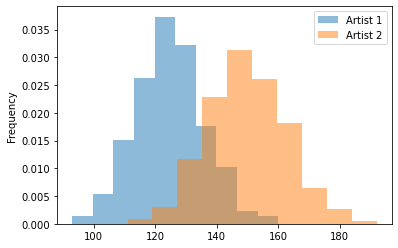

In [97]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

---
**Q:** What does the regular expression `'\s+'` match on? 

**A:** whitespace character ([\r\n\t\f\v ]) at least once.

---

In [98]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [100]:
# Your lyric length comparison chart here. 
# making a copy, just in case... tired of scrolling back
lyrics_end_df = lyrics_df

# adding length column
lyrics_end_df['length'] = [len(lyrics_end_df['tokens'][i]) for i in range(len(lyrics_end_df))]
lyrics_end_df.sample(5)

,artist,song_title,song_lyrics,tokenized,tokens,tokenized_title,tokens_title,length
307,cher,you dont have to say you love me\n,you dont have to say you love me when i said i...,"[you, dont, have, to, say, you, love, me, when...","[dont, say, love, said, needed, said, would, a...","[you, dont, have, to, say, you, love, me]","[dont, say, love]",87
402,robyn,should have known\n,should have known i should have seen it coming...,"[should, have, known, i, should, have, seen, i...","[known, seen, coming, fucking, known, could, l...","[should, have, known]",[known],97
319,robyn,baby forgive me\n,baby forgive me here come the night in your ey...,"[baby, forgive, me, here, come, the, night, in...","[baby, forgive, come, night, eyes, baby, brave...","[baby, forgive, me]","[baby, forgive]",77
238,cher,superstar\n,superstar long ago and so far away ah i fell i...,"[superstar, long, ago, and, so, far, away, ah,...","[superstar, long, ago, far, away, ah, fell, lo...",[superstar],[superstar],93
2,cher,after all\n,after all well here we are again i guess it mu...,"[after, all, well, here, we, are, again, i, gu...","[well, guess, must, fate, weve, tried, deep, i...","[after, all]",[],120


artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

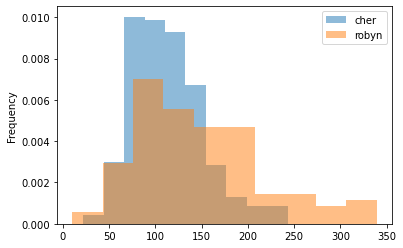

In [101]:
# plotting
    # df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
lyrics_end_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)